In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

import optuna
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_iter": trial.suggest_int("max_iter", 100, 1000),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 255),
        "max_depth": trial.suggest_int("max_depth", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50),
        "l2_regularization": trial.suggest_float("l2_regularization", 1e-5, 10.0, log=True),
        "max_bins": trial.suggest_int("max_bins", 32, 255),
        "early_stopping": trial.suggest_categorical("early_stopping", [True, False]),
        "scoring": trial.suggest_categorical("scoring", ["accuracy", "loss"]),
        "loss": trial.suggest_categorical("loss", ["log_loss"])
    }

    clf = HistGradientBoostingClassifier(
        **params,
        random_state=42
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, Y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return np.mean(scores)

study = optuna.create_study(study_name = "HistGB", direction="maximize", storage = "sqlite:///histgb.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy: {study.best_value:.4f}")
print("Best Hyperparameters:")
for key, val in study.best_params.items():
    print(f"  {key}: {val}")

[I 2025-05-30 22:59:21,875] A new study created in RDB with name: HistGB
[I 2025-05-30 22:59:29,892] Trial 0 finished with value: 0.9240560923164447 and parameters: {'learning_rate': 0.029264310274254062, 'max_iter': 403, 'max_leaf_nodes': 33, 'max_depth': 19, 'min_samples_leaf': 33, 'l2_regularization': 0.2775374640075972, 'max_bins': 229, 'early_stopping': False, 'scoring': 'accuracy', 'loss': 'log_loss'}. Best is trial 0 with value: 0.9240560923164447.
[I 2025-05-30 22:59:34,595] Trial 1 finished with value: 0.9251333384759526 and parameters: {'learning_rate': 0.036283861384713165, 'max_iter': 596, 'max_leaf_nodes': 172, 'max_depth': 2, 'min_samples_leaf': 24, 'l2_regularization': 2.8179176930273162e-05, 'max_bins': 110, 'early_stopping': True, 'scoring': 'loss', 'loss': 'log_loss'}. Best is trial 1 with value: 0.9251333384759526.
[I 2025-05-30 22:59:37,113] Trial 2 finished with value: 0.9227237682221483 and parameters: {'learning_rate': 0.11332405101309434, 'max_iter': 767, 'max_l

Best Accuracy: {study.best_value:.4f}
Best Hyperparameters:
  learning_rate: 0.01349722828678564
  max_iter: 479
  max_leaf_nodes: 235
  max_depth: 4
  min_samples_leaf: 29
  l2_regularization: 0.055830758657345034
  max_bins: 80
  early_stopping: False
  scoring: accuracy
  loss: log_loss


In [5]:
model = HistGradientBoostingClassifier(
        learning_rate = 0.01349722828678564,
        max_iter = 479,
        max_leaf_nodes = 235,
        max_depth = 4,
        min_samples_leaf = 29,
        l2_regularization = 0.055830758657345034,
        max_bins = 80,
        early_stopping = False,
        scoring = "accuracy",
        loss = "log_loss")
model.fit(X_train, Y_train)

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(early_stopping=False,
                               l2_regularization=0.055830758657345034,
                               learning_rate=0.01349722828678564, max_bins=80,
                               max_depth=4, max_iter=479, max_leaf_nodes=235,
                               min_samples_leaf=29, scoring='accuracy')

In [7]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[0 1 2 ... 2 2 2]
       0
42222  0
29490  1
7168   2
35124  1
29931  2
...   ..
41573  2
22780  0
42708  2
28199  2
22171  2

[8819 rows x 1 columns]
0.9225535775031183
              precision    recall  f1-score   support

           0   0.788497  0.788985  0.788741      1616
           1   0.795686  0.795210  0.795448      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922554      8819
   macro avg   0.861394  0.861398  0.861396      8819
weighted avg   0.922554  0.922554  0.922554      8819



PermutationExplainer explainer: 8820it [2:33:49,  1.05s/it]                            
C:\Users\eddie\AppData\Local\Temp\ipykernel_48776\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


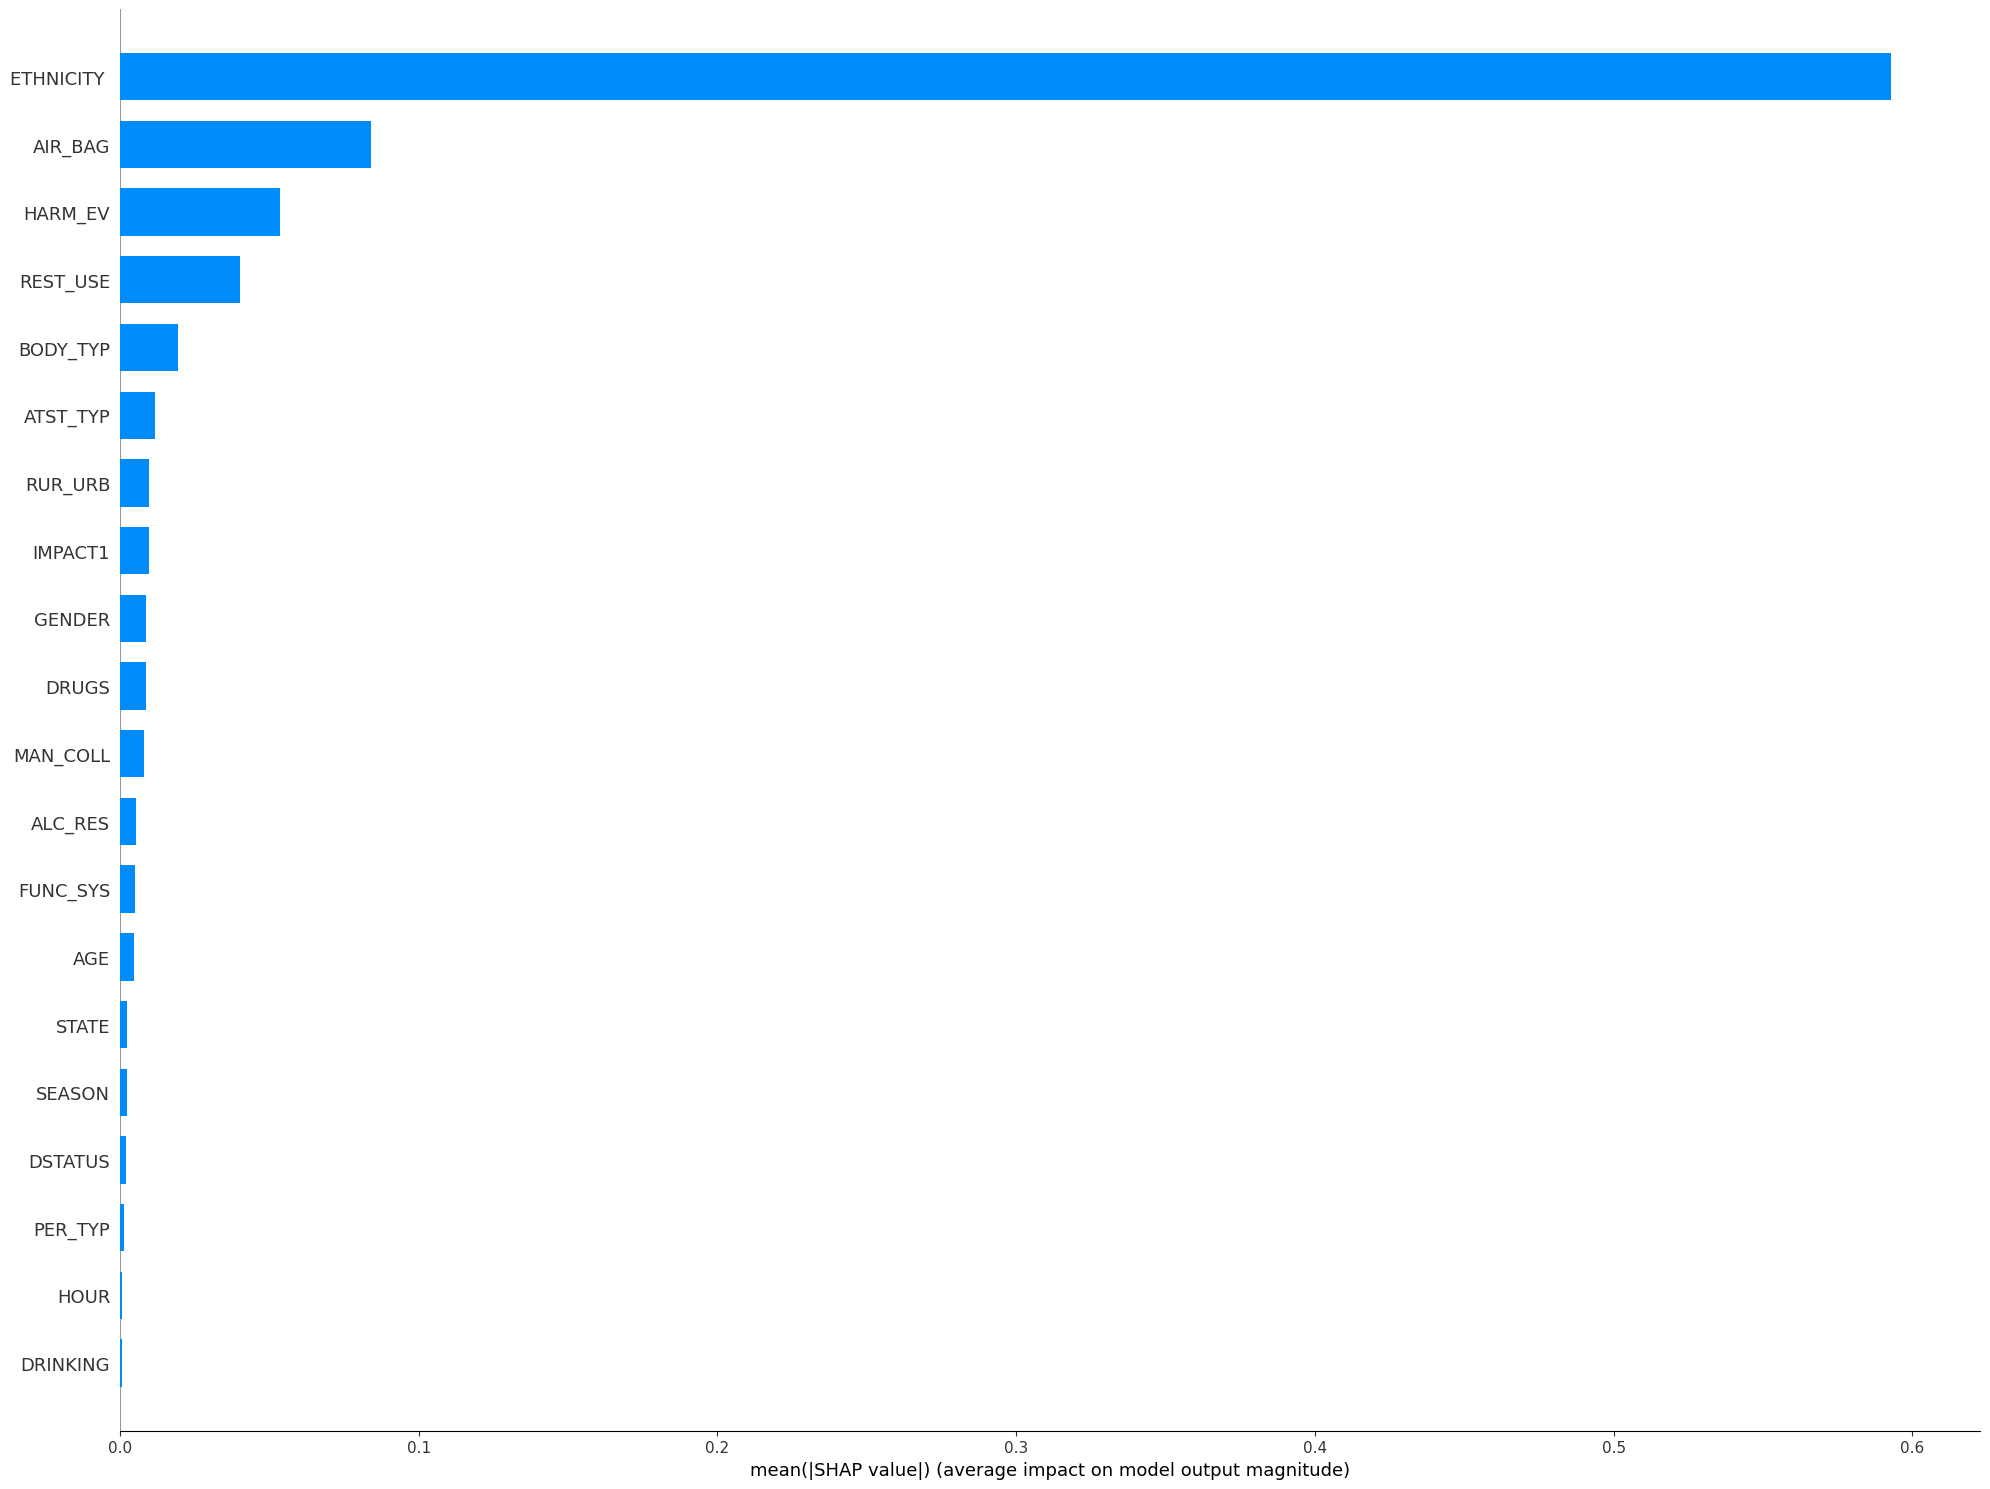

In [8]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

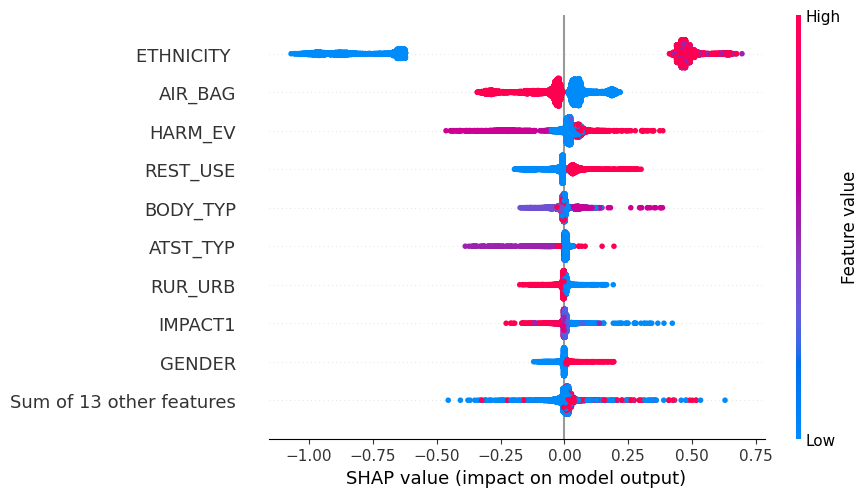

In [9]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

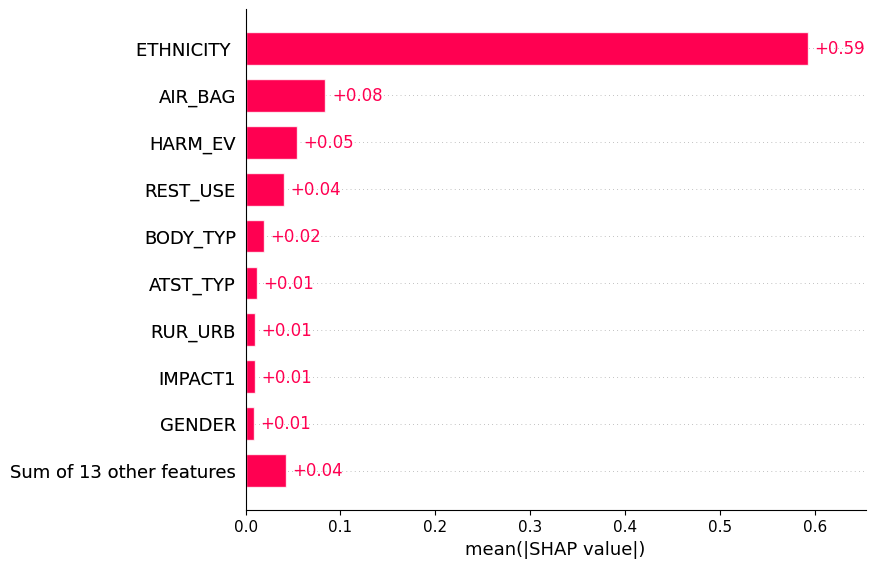

In [10]:
shap.plots.bar(explanation)

In [11]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/histgb/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [12]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/histgb/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


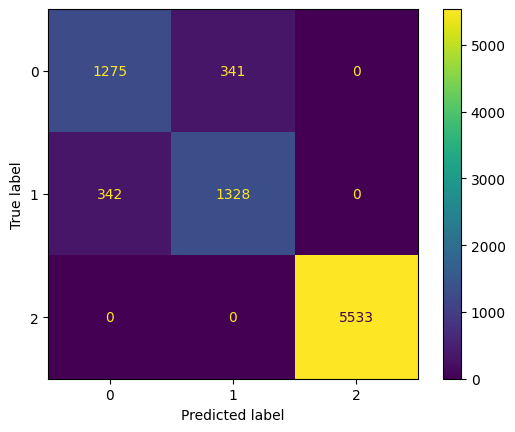

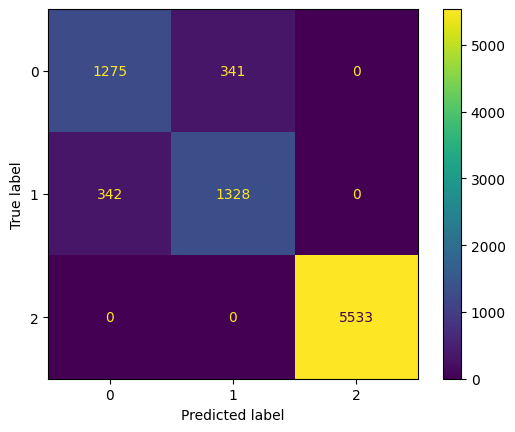

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()